In [1]:
from os.path import join

import numpy as np
from hydra import initialize, compose

with initialize(version_base=None, config_path="../../src/conf/"):
    cfg = compose(config_name='extract_features.yaml', overrides=["local=default"])
    print(cfg)

MissingConfigException: Cannot find primary config 'extract_features.yaml'. Check that it's in your config search path.

Config search path:
	provider=hydra, path=pkg://hydra.conf
	provider=main, path=file:///home/sasce/PycharmProjects/CodeGraphClassification/src/conf
	provider=hydra-colorlog, path=pkg://hydra_plugins.hydra_colorlog.conf
	provider=schema, path=structured://

In [ ]:
import pandas as pd

df = pd.read_json(join(cfg.raw_data, 'dataset_with_graphs.jsonl'), orient='records', lines=True)

In [3]:
df.shape

(60195, 7)

In [4]:
from collections import Counter

label_distribution = Counter()
labels = [x for proj_label in df['label'].to_list() for x in proj_label]
label_distribution.update(labels)

In [5]:
label_distribution.most_common()

[('database', 3360),
 ('server', 2566),
 ('microservices', 2423),
 ('security', 2323),
 ('machine learning', 2012),
 ('video game', 1822),
 ('software testing', 1772),
 ('big data', 1687),
 ('application performance management', 1477),
 ('authentication', 1475),
 ('instant messaging', 1396),
 ('cloud computing', 1299),
 ('internet of things', 1279),
 ('static program analysis tool', 1222),
 ('website', 1221),
 ('World Wide Web', 1190),
 ('internet bot', 1183),
 ('web application', 1181),
 ('parsing', 1017),
 ('data visualization', 1005),
 ('bioinformatics', 997),
 ('streaming media', 967),
 ('video', 943),
 ('geographic information system', 913),
 ('static program analysis', 902),
 ('natural language processing', 898),
 ('object–relational mapping', 857),
 ('search', 857),
 ('test automation', 833),
 ('encryption', 827),
 ('client', 804),
 ('telecommunications network', 786),
 ('algorithm', 749),
 ('blockchain', 746),
 ('image', 737),
 ('mobile computing', 734),
 ('distributed computin

In [6]:
len(label_distribution)

267

In [7]:
sum([1 for _, x in label_distribution.most_common() if x > 100])

180

In [8]:

num_examples = []
nums = list(np.linspace(start=1, stop=max(df['nodes'].to_list()), num=100))
for i in nums:
    tmp_df = df[df['nodes'] <= i]
    num_examples.append(tmp_df.shape[0])

<AxesSubplot: >

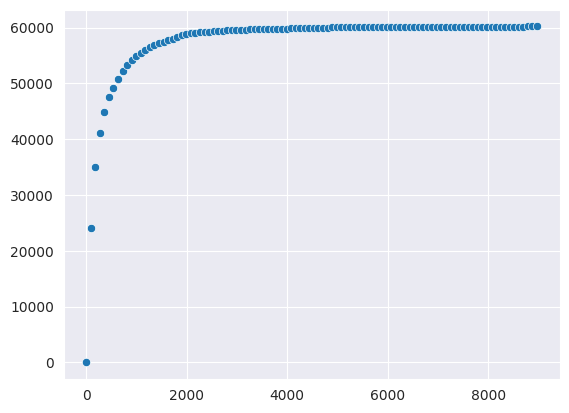

In [9]:
import seaborn

seaborn.scatterplot(x=nums, y=num_examples)

<AxesSubplot: >

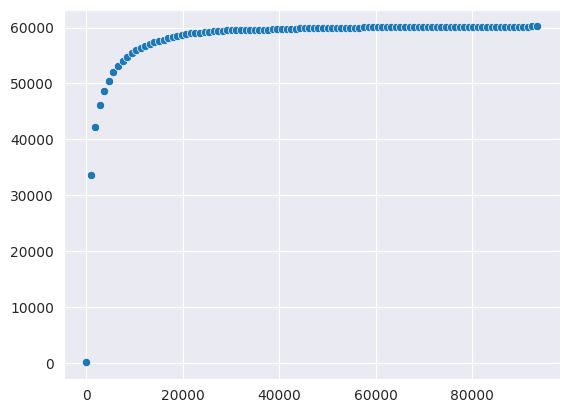

In [10]:

num_examples = []
nums = list(np.linspace(start=1, stop=max(df['edges'].to_list()), num=100))
for i in nums:
    tmp_df = df[df['edges'] <= i]
    num_examples.append(tmp_df.shape[0])
import seaborn

seaborn.scatterplot(x=nums, y=num_examples)